### Kaggle team name: Ekaterina Sinkova 

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
data.shape #52582 объекта, 20 признаков

(5282, 20)

In [6]:
data.sample(5) #случайные строки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1020,72,78.85,5763.15,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),0
2851,67,111.30,7482.1,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
1301,28,106.15,3152.5,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3111,71,107.50,7713.55,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
1804,40,50.15,2058.5,Male,0,Yes,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [7]:
data.isna().sum() #на первый взгляд нанов нет...

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
data.duplicated().sum() #проверка на дублирующие строки - есть 14 дублей!

14

In [9]:
data = data.drop_duplicates() #удаляем дубли из датасета
data.shape

(5268, 20)

In [10]:
for i in range(len(feature_cols)):
    print(data[feature_cols[i]].value_counts())

#посмотрим на значения в колонках. В "TotalSpent" 9 объектов с пробелами вместо значений

1     443
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: ClientPeriod, Length: 73, dtype: int64
20.05    45
19.95    34
19.65    34
20.00    33
19.70    32
         ..
38.25     1
66.35     1
58.70     1
98.25     1
64.45     1
Name: MonthlySpending, Length: 1468, dtype: int64
           9
19.75      8
20.2       7
20.05      5
19.9       5
          ..
2067       1
4730.9     1
1037.75    1
2665       1
2768.35    1
Name: TotalSpent, Length: 4978, dtype: int64
Male      2647
Female    2621
Name: Sex, dtype: int64
0    4427
1     841
Name: IsSeniorCitizen, dtype: int64
No     2691
Yes    2577
Name: HasPartner, dtype: int64
No     3662
Yes    1606
Name: HasChild, dtype: int64
Yes    4747
No      521
Name: HasPhoneService, dtype: int64
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetS

In [539]:
data[data['TotalSpent'] == ' ']
#видим, что в этих объектах 'ClientPeriod' равно нулю, видимо, данные о тратах не успели накопиться или отсутствуют

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [14]:
#заменим пропуски нулями
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0)
#переводим в численный формат
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [16]:
# юб
from pylab import rcParams

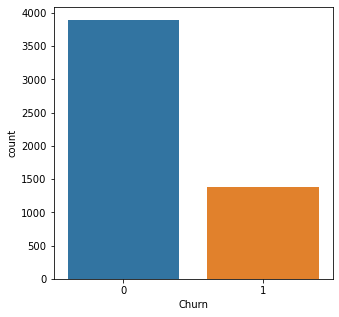

In [17]:
rcParams['figure.figsize'] = 5, 5
sns.countplot(x = data['Churn']);
#посмотрим на распределение целевого признака. Сильной разбалансированности классов не наблюдается.

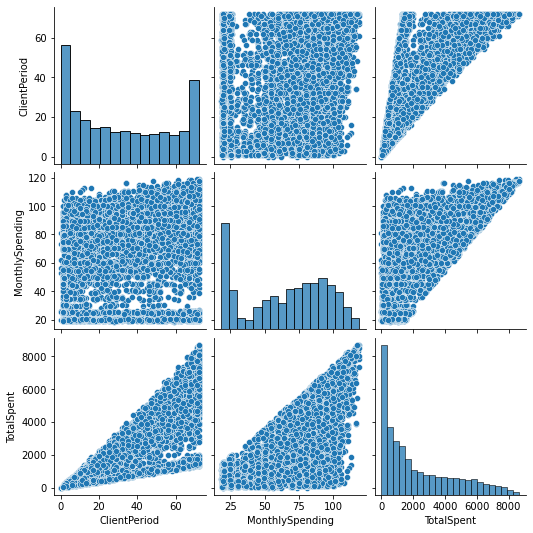

In [18]:
sns.pairplot(data[num_cols])
#посмотрим на распределения численных признаков
#Прямая пропорциональность между TotalSpent и ClientPeriod

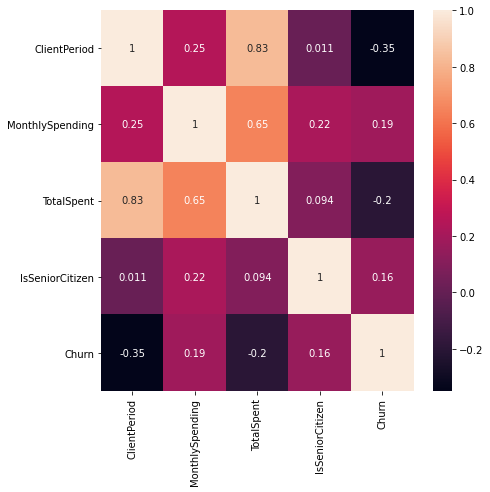

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
sns.heatmap(data.corr(),annot=True);

#корелляция числовых признаков. Видим, что с целевым признаком больше всего связан ClientPeriod

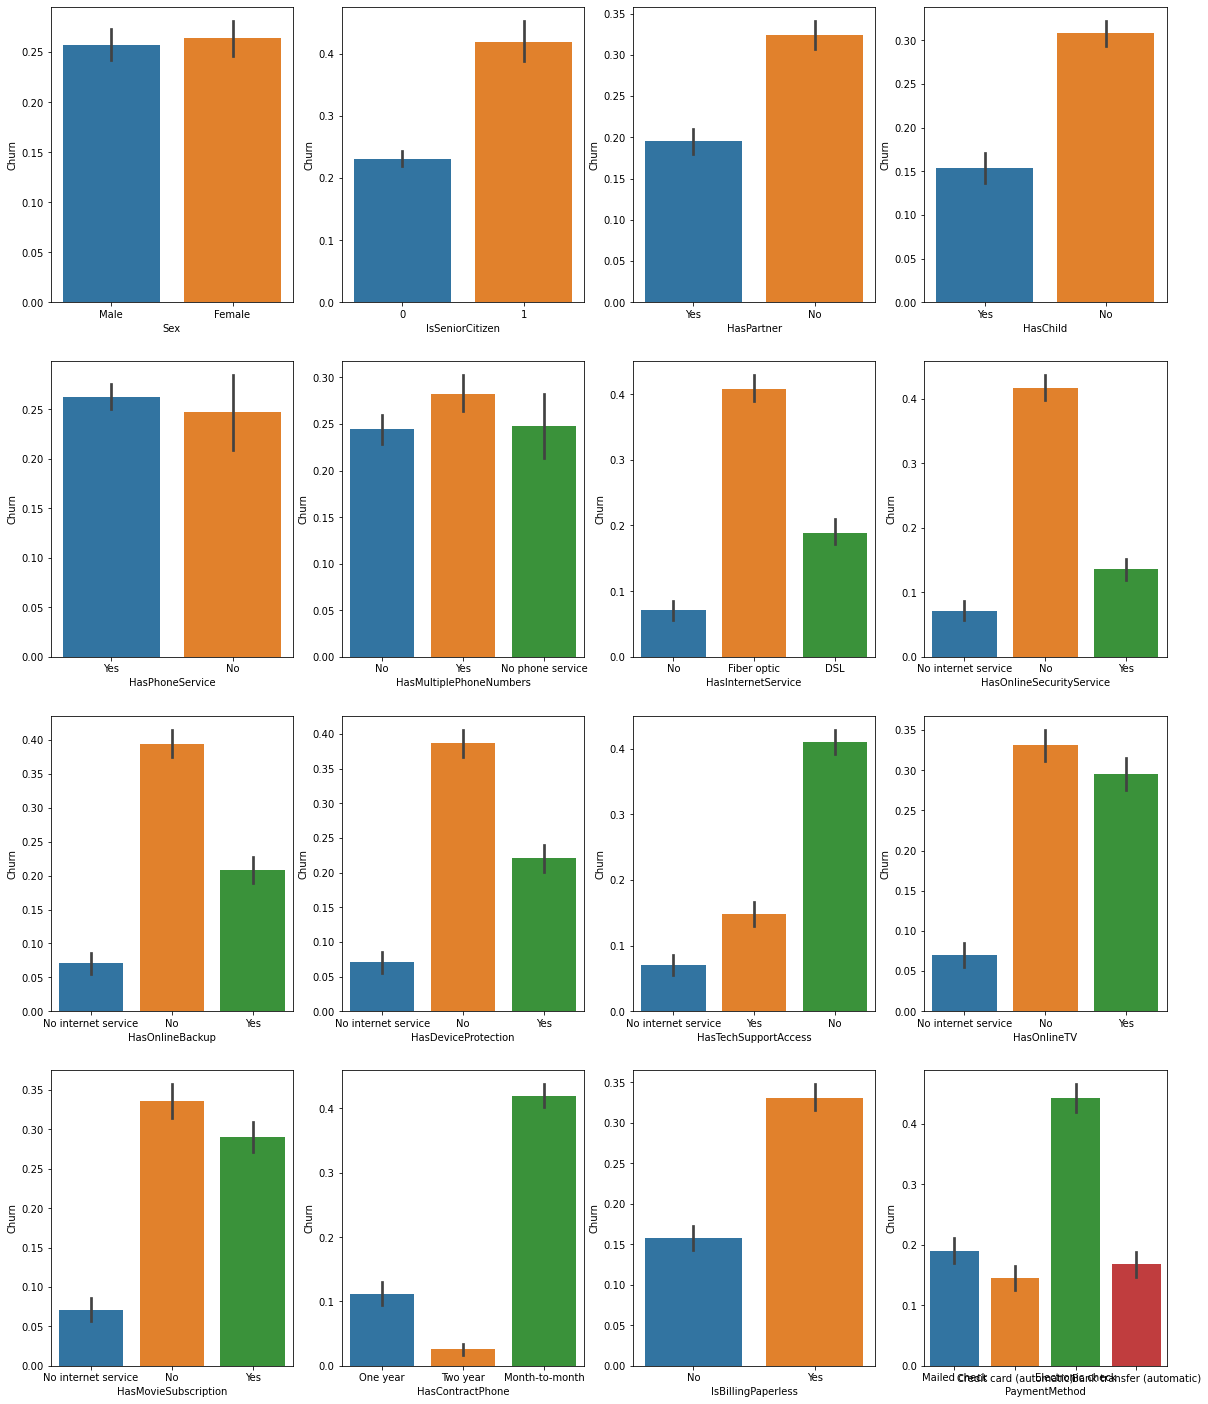

In [20]:
rcParams['figure.figsize'] = 20, 25
for index,col in enumerate(cat_cols):
    plt.subplot(4, 4, index + 1)
    sns.barplot(x=col, y='Churn', data=data)
plt.show() 

#построим распределния категориальных признаков в зависимости от целевого признака.
#Можно сделать вывод, что пенсионеры и клиенты с семьей и детьми - лояльнее других. 
# И интересное наблюдение - примерно у 2/3 ушедших клиентов чеки приходили в цифровом формате (признак IsBillingPaperless)

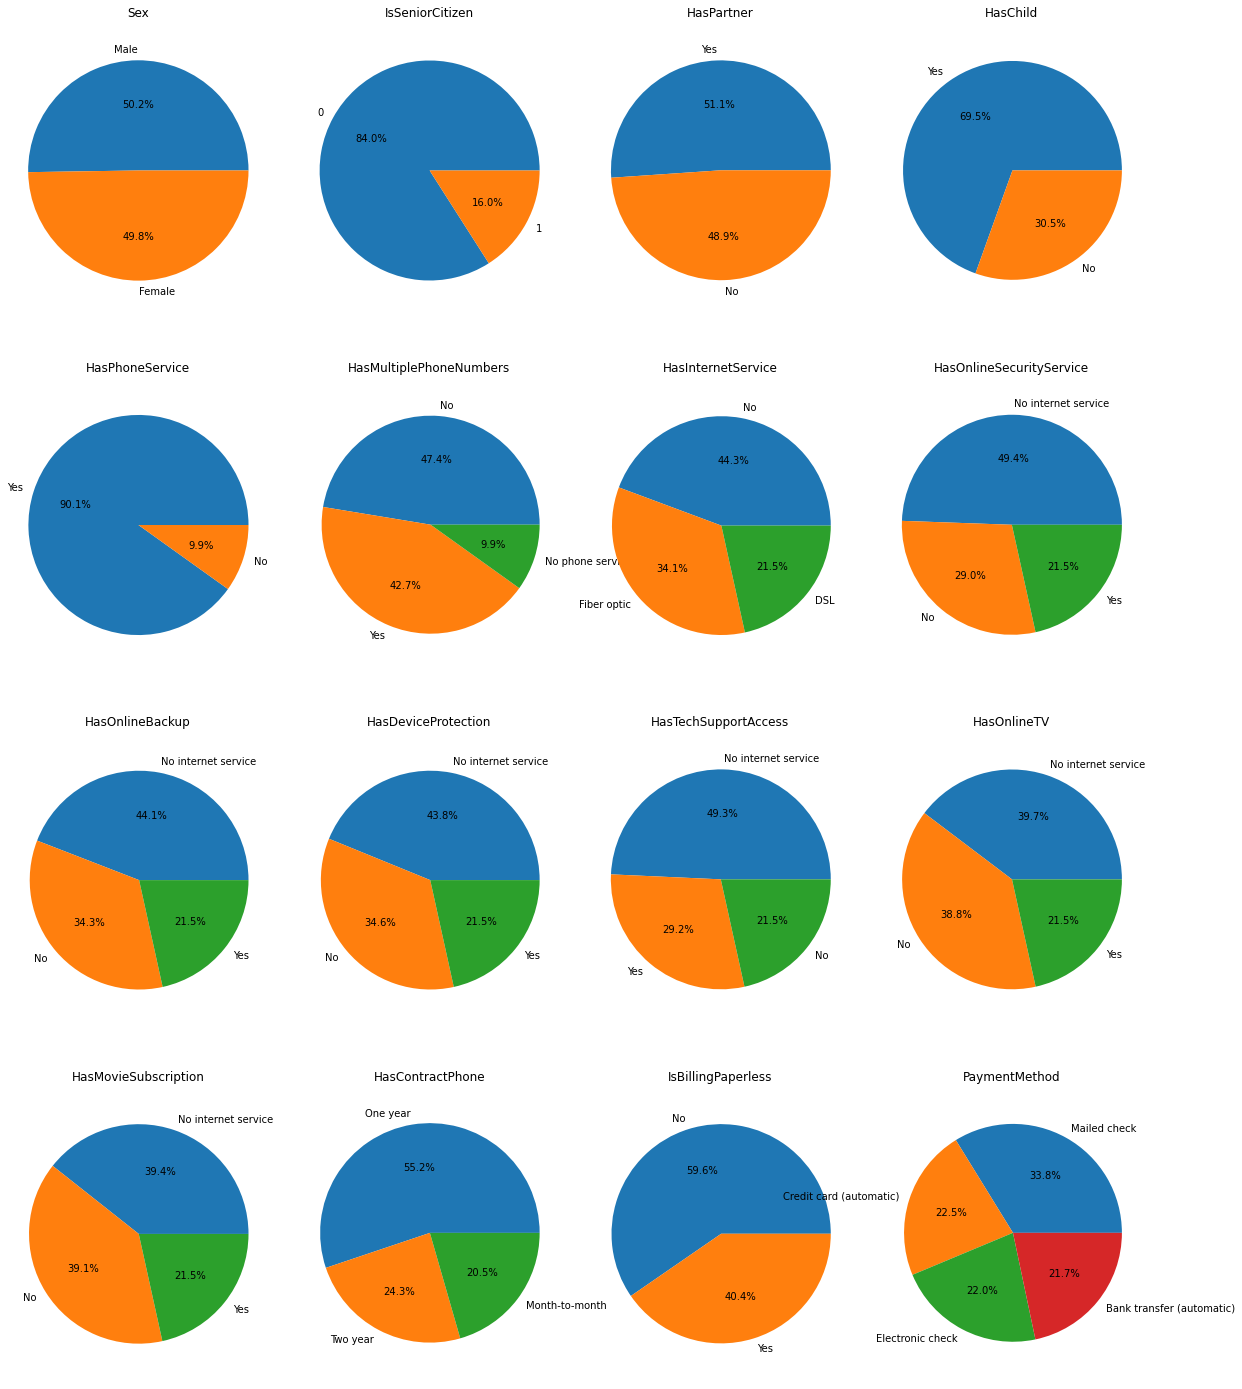

In [21]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 25

for index, feature in enumerate(cat_cols):
    plt.subplot(4, 4, index + 1)
    plt.pie(data[feature].value_counts(), labels=data[feature].unique(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(feature)
    #plt.legend()
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score

In [23]:
data_cat = data.copy()
#делаю копию для CatBoost, так как он работает с категориальными признаками.

In [551]:
cols = ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']
for col in cols:
    data[col] = np.where(data[col] == 'Yes', 1, 0)

#В бинарных признаках заменяю да/нет на 1/0     

In [552]:
data['Sex'] = np.where(data['Sex'] == 'Male', 1, 0)
#заменяю М/Ж на 1/0   

In [553]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,0,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,0
1,72,25.85,1872.20,0,0,0,0,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,0,0,0,0,0,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,0,Electronic check,1
3,32,79.30,2570.00,0,1,0,0,0,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,0,0,0,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),0


In [554]:
data = pd.get_dummies(data)
#one-hot encoding

In [555]:
data.shape

(5268, 41)

In [556]:
X = data.drop('Churn', axis = 1)
X.shape
#матрица признаков

(5268, 40)

In [557]:
y = data['Churn']
y.shape
#целевой вектор

(5268,)

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [559]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

#чтобы избежать утечки данных из тренировочной в тестовую выборку, 
#обучение ведется только на тренировочной выборке, а нормирование - на обеих

In [513]:
lr = LogisticRegressionCV(scoring ='roc_auc', refit=True, cv=5, random_state=42)
lr.fit(X_train,y_train)
#логистическая регрессия с кросс-валидацией (5 фолдов)

LogisticRegressionCV(cv=5, random_state=42, scoring='roc_auc')

In [514]:
lr.get_params(deep=True)

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [515]:
lr.score(X_test,y_test)
#скор 0,835

0.8347842900747192

In [362]:
from sklearn.ensemble import RandomForestClassifier

In [402]:
rf = RandomForestClassifier(n_estimators=350,random_state=42)
#ради интереса попробуем случайный лес

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#заново делим датасет, т.к. для решающих деревьем нормировка данных не требуется

In [499]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [500]:
rf.score(X_test,y_test)
#скор 0,792, сейчас будет подбирать оптимальные параметры 

0.7922201138519924

In [501]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

#сначала примерно оценим, где искать оптимальные параметры с помощью функции RandomizedSearchCV

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [502]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand, param_distributions=random_grid,
                              n_iter = 50, scoring='roc_auc', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [503]:
rf_random.best_params_
#грубая оценка оптимальных параметров

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [504]:
#Теперь, на основе полученных данных будем искать оптимальные параметры с меньшим шагом
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [400, 450, 500, 550, 1000]
}

rf2 = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                           scoring = 'roc_auc', cv = 3, 
                           n_jobs = -1, verbose = 2)

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [60, 70, 80, 90],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [400, 450, 500, 550, 1000]},
             scoring='roc_auc', verbose=2)

In [505]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 500}

In [506]:
grid_search_rf.score(X_test,y_test)
#скор для случайного леса с оптимальными параметрами - 0,819, что хуже,чем для логистической регрессии

0.8192163728567977

Самое большое значение roc_auc = 0,835 получено для логистической регрессии с параметром С = 10. 

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [439]:
data_cat.shape
#берем копию исходного датасета с неизменными данными

(5268, 20)

In [440]:
X_boost = data_cat.drop('Churn', axis=1)
y_boost = data_cat['Churn']

In [442]:
from catboost import CatBoostClassifier

In [493]:
cb = CatBoostClassifier(iterations = 100, depth = 5, learning_rate = 0.1, custom_loss = 'AUC')

In [445]:
X_train, X_valid, y_train, y_valid = train_test_split(X_boost, y_boost, test_size=0.2)

In [494]:
cb.fit(X_train, y_train, cat_features=cat_cols, verbose = False)

In [495]:
predictions = cb.predict_proba(X_valid)

In [496]:
roc_auc = roc_auc_score(y_valid, predictions[:, 1])
roc_auc

0.8362005882774948

Алгоритм catboost позволил получить самый высокий скор 0,836 при iterations = 100 и learning_rate = 0.1 

# Предсказания

In [516]:
best_model = cb
#лучшая модель - катбуст

In [517]:
best_model.fit(X_boost, y_boost, cat_features=cat_cols, verbose = False)
#обучаем модель на всем датасете

In [523]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col = 'Id')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')
#записываем предикты в файл

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.